## Installing PRAW: A Guide to Accessing Reddit's API

In [9]:
!pip install praw


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Reddit API Authentication

In [21]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="zC10-OcQWeZW-JaslA5glA",
    client_secret="pW5xIkxi2QcTspWUNmr_NJhAeb8m7A",
    user_agent=user_agent
)

In [22]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## New rising topics on selected word

In [26]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("worldcup").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

has anyone seen a mock or sample schedule of what the 104 matchups could look like in 2026 with dates and stadium and possible teams?
1akjd5p
QuirkyNose1834
1707250524.0
9
0.91
https://www.reddit.com/r/worldcup/comments/1akjd5p/has_anyone_seen_a_mock_or_sample_schedule_of_what/
0


## Selecting headlines of subreddits on selected topic

In [28]:
headlines = set()
for submission in reddit.subreddit("worldcup").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

676


## Creating dataset

In [30]:
#Create a dataframe from the scrapped data 
worldcup_df = pd.DataFrame(headlines)
worldcup_df.head()

,0
0,Comparing a manager's club performance vs inte...
1,What is your favorite team that has won the Wo...
2,Double-elimination followed by knock-out for 4...
3,Question for FIFA+ World Cup 2022 Full Match R...
4,'Spanish football federation leaders demand re...


In [32]:
worldcup_df.columns

RangeIndex(start=0, stop=1, step=1)

In [34]:
worldcup_df.columns = ['Titles']

In [36]:
worldcup_df.head()

,Titles
0,Comparing a manager's club performance vs inte...
1,What is your favorite team that has won the Wo...
2,Double-elimination followed by knock-out for 4...
3,Question for FIFA+ World Cup 2022 Full Match R...
4,'Spanish football federation leaders demand re...


In [38]:
worldcup_df.Titles.duplicated().sum() 

0

## Cleaning headlines

In [41]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
worldcup_df["Titles"]= worldcup_df["Titles"].apply(cleanTxt)

#Show the clean text
worldcup_df.head()

,Titles
0,Comparing a manager's club performance vs inte...
1,What is your favorite team that has won the Wo...
2,Double-elimination followed by knock-out for 4...
3,Question for FIFA+ World Cup 2022 Full Match R...
4,'Spanish football federation leaders demand re...


In [44]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
worldcup_df["Titles"]= worldcup_df["Titles"].apply(remove_emoji)

#Show the clean text
worldcup_df.head()

,Titles
0,Comparing a manager's club performance vs inte...
1,What is your favorite team that has won the Wo...
2,Double-elimination followed by knock-out for 4...
3,Question for FIFA+ World Cup 2022 Full Match R...
4,'Spanish football federation leaders demand re...


In [47]:
!pip install textblob


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

## Getting polarity and insight

In [53]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
worldcup_df['Subjectivity'] = worldcup_df['Titles'].apply(getSubjectivity)
worldcup_df['Polarity'] = worldcup_df['Titles'].apply(getPolarity)

#Now display data
worldcup_df.head()

,Titles,Subjectivity,Polarity
0,Comparing a manager's club performance vs inte...,0.00,0.00
1,What is your favorite team that has won the Wo...,1.00,0.50
2,Double-elimination followed by knock-out for 4...,0.00,0.00
3,Question for FIFA+ World Cup 2022 Full Match R...,0.55,0.35
4,'Spanish football federation leaders demand re...,0.00,0.00


In [58]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
worldcup_df["Insight"] = worldcup_df["Polarity"].apply(getInsight)

worldcup_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Comparing a manager's club performance vs inte...,0.000000,0.000000,Neutral
1,What is your favorite team that has won the Wo...,1.000000,0.500000,Positive
2,Double-elimination followed by knock-out for 4...,0.000000,0.000000,Neutral
3,Question for FIFA+ World Cup 2022 Full Match R...,0.550000,0.350000,Positive
4,'Spanish football federation leaders demand re...,0.000000,0.000000,Neutral
5,What are the Top 10 biggest wins in Men’s Seni...,0.233333,0.266667,Positive
6,"When messi sees former teammates, kinda makes ...",0.325000,0.000000,Neutral
7,The player that helped Messi and Argentina to ...,0.400000,0.800000,Positive
8,What is the Entrance Song for 2023 FIFA Women'...,0.000000,0.000000,Neutral
9,"'We're going there to win it', Christine Sincl...",0.400000,0.800000,Positive


In [60]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Getting polarity and insight

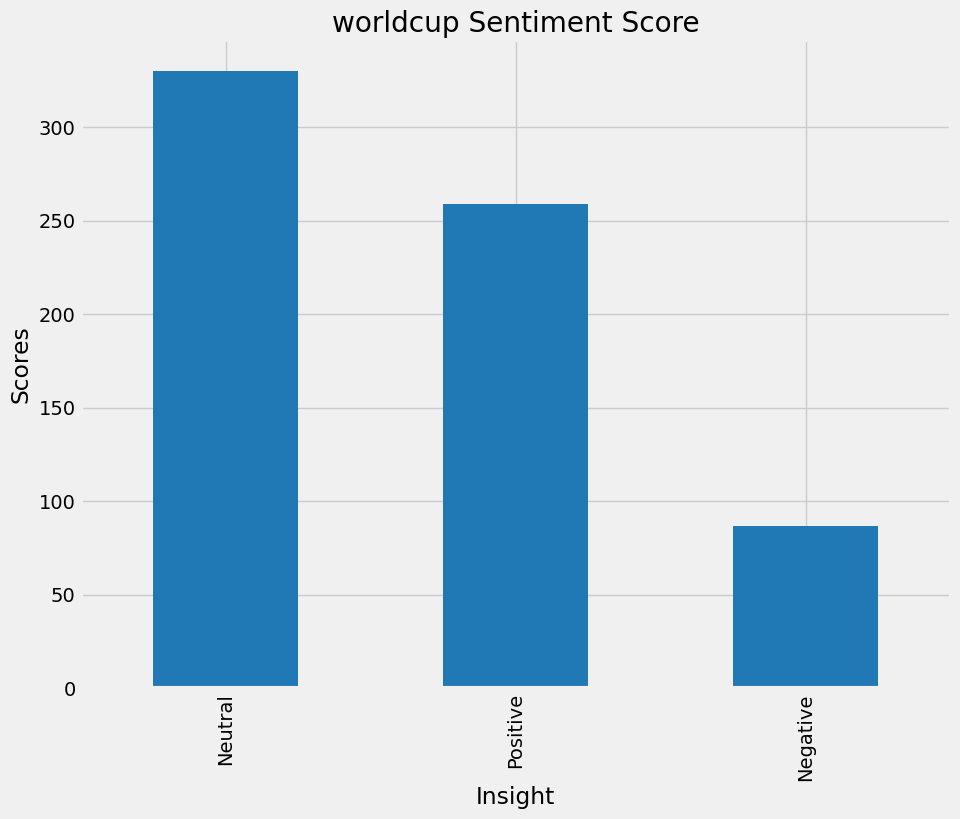

In [63]:
#Plot the values count of sentiment
plt.title("worldcup Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
worldcup_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Creating WordCloud

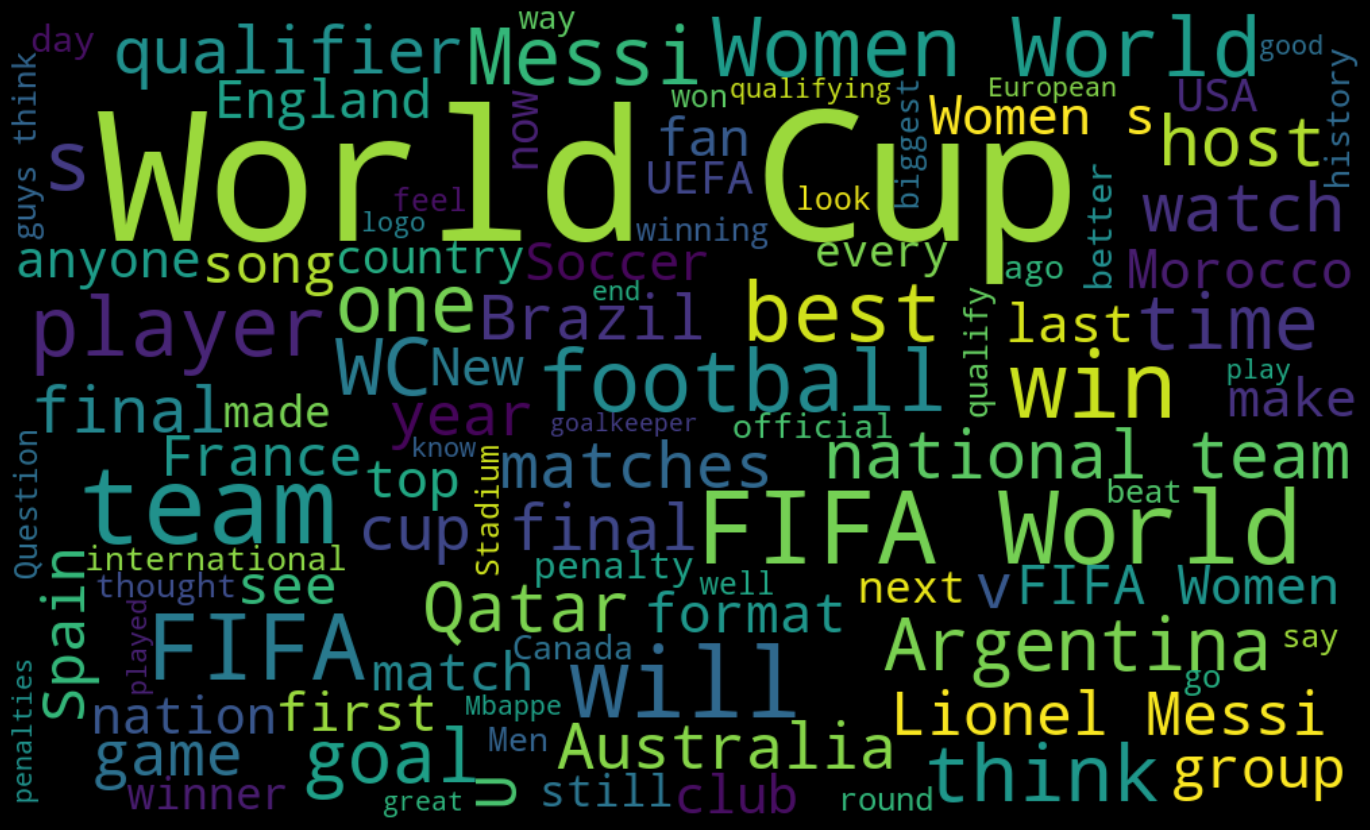

In [64]:
text = ' '.join( [twts for twts in worldcup_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");